             Is Nesting Instinct Real? Exploring Causes of House Building Trends in Hungary 


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

In [99]:
df=pd.read_csv('data.csv')

In [103]:
df.drop(['Date'], axis=1, inplace=True)

In [108]:
df.set_index(pd.date_range(start='2016-01-31', periods=52, freq='M'), inplace=True)

In [167]:
df.dropna(inplace=True)
df.head()

,Marriages,Births,Building permits,Loan costs,Consumer confidence index,Marriages trend,Permits trend
2017-01-31,1497.0,7748.0,454.0,5.136537,-11.7,4227.625000,831.208333
2017-02-28,1851.0,6891.0,649.0,5.060305,-12.4,4224.041667,853.250000
2017-03-31,2758.0,7502.0,1031.0,4.885639,-11.5,4252.375000,857.166667
2017-04-30,3581.0,6838.0,950.0,4.794613,-16.4,4251.750000,852.666667
2017-05-31,5926.0,7626.0,1186.0,4.765134,-16.1,4228.416667,852.458333


In [110]:
df.describe()

,Marriages,Births,Building permits,Loan costs,Consumer confidence index
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4517.720000,7575.900000,836.380000,4.989896,-12.382000
std,2433.736592,530.882832,201.918845,0.456596,4.718686
min,1451.000000,6545.000000,301.000000,4.297702,-23.800000
25%,2314.500000,7111.500000,722.250000,4.582018,-16.050000
50%,3598.500000,7573.500000,854.500000,5.025734,-12.100000
75%,6634.000000,7980.500000,950.750000,5.314665,-8.925000
max,11292.000000,8598.000000,1283.000000,5.793540,-3.700000


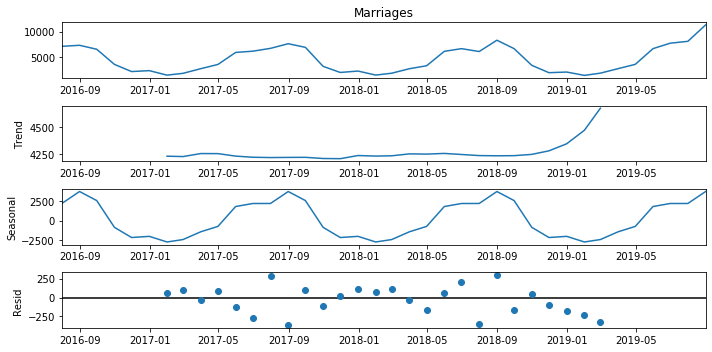

In [132]:
resm = sm.tsa.seasonal_decompose(df['Marriages'])
fig=resm.plot()
fig.set_size_inches(10, 5)
plt.tight_layout()

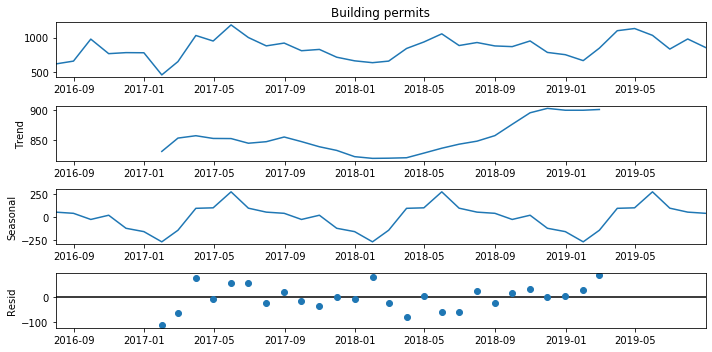

In [133]:
resb = sm.tsa.seasonal_decompose(df['Building permits'])
fig=resb.plot()
fig.set_size_inches(10, 5)
plt.tight_layout()

In [134]:
df['Marriages trend']=resm.trend
df['Permits trend']=resb.trend
df.dropna(inplace=True)

In [140]:
df.columns

Index(['Marriages', 'Births', 'Building permits', 'Loan costs',
       'Consumer confidence index', 'Marriages trend', 'Permits trend'],
      dtype='object')

In [157]:
X=df[['Loan costs', 'Marriages trend']]
y=df['Permits trend']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [158]:
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

,Coefficient
Loan costs,58.187751
Marriages trend,0.069012


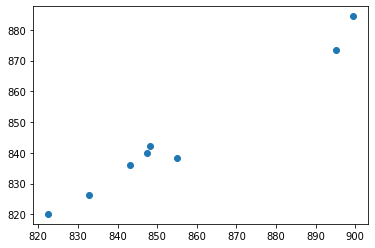

In [161]:
prediction=lm.predict(X_test)
plt.scatter(y_test, prediction)

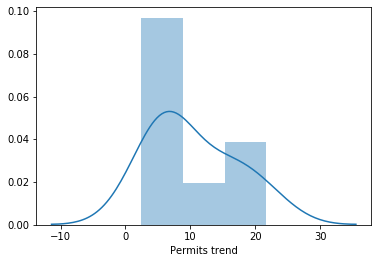

In [162]:
sns.distplot((y_test-prediction))

In [164]:
MAE=metrics.mean_absolute_error(y_test, prediction)
MSE=metrics.mean_squared_error(y_test, prediction)
RMSE=np.sqrt(MSE)
print('MAE:',MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)

MAE: 10.357476059344037
MSE:  145.59854163321424
RMSE:  12.066422072562116


Conclusion: small data, try other methods, however prediction results are OK